In [5544]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
from os.path import exists as file_exists
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [5545]:

  
# Initialize GoogleDriveFile instance with file id
if (file_exists('Customer Info(Responses).xls') == False):
    
    # Initializing a GoogleAuth Object
    gauth = GoogleAuth()
    
    # client_secrets.json file is verified
    # and it automatically handles authentication
    gauth.LocalWebserverAuth()
    
    # GoogleDrive Instance is created using
    # authenticated GoogleAuth instance
    drive = GoogleDrive(gauth)
    file_obj = drive.CreateFile({'id': '1BeZVLRL4QPNgj640lZoyu2u9CSgCIRlWVDb0EwvSa6E'})
    file_obj.GetContentFile('Customer Info(Responses).xls',
         mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')
else:
    df1 = pd.read_excel('Customer Info(Responses).xls')
    df2 = pd.read_excel('Customer Info(Responses)-extend.xls')
    dfs = [df1, df2]
    df = pd.concat(dfs)
    
    df.drop_duplicates(inplace=True)
    #dedup check
    #dp = df.duplicated()
    #print(dp.sum())
    df.dropna(0,inplace=True)
    
    df.rename(columns={'Rate your satisfaction at our company.':'Satisfaction Rate', 'What is your average monthly income?' : 'Avg Monthly Income'},inplace=True)


C:\Users\abdul\AppData\Local\Temp\ipykernel_41356\1427147877.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0,inplace=True)


In [5546]:
def extract_email_ID(string):
    email = re.findall(r'(.+?)@', string)
    
    return email[0] if email else np.nan

In [5547]:
df['Avg Monthly Income'] = df['Avg Monthly Income'].replace('[\$,]', '', regex=True).astype(float)


In [5548]:
def indices(lst, item):
   return [i for i, x in enumerate(lst) if x == item]

In [5549]:
emails = []
for email in df['Email']:
    emails.append(extract_email_ID(email))

indiceslist = []
count = 0

for email in emails:
    indiceslist = indices(emails,email)
    if(len(indiceslist) > 1):
        count+=1
        for i in indiceslist:
            df.drop(i,inplace=True)



if(count == 0):
    print('No duplicate emails found!')
    

No duplicate emails found!


In [5550]:
df

,Timestamp,Name,Country,Age,Email,Address,Phone number,Gender,Satisfaction Rate,Avg Monthly Income
0,1/30/2023 17:57:49,Abdulrahman Afifi,Egypt,22,abdulrahmanafifi33@gmail.com,"Nardenk Sokağı, Abbasağa Mahallesi 34022, Ista...",905528499159,Male,4,25000.0
1,1/30/2023 18:05:17,Alex John,Argentina,34,alex.john35@gmail.com,"Ariensplein 1, Enschede, Netherlands",31684475461,Male,3,34000.0
2,1/30/2023 18:08:13,Rebecca David,UK,45,rebecca49david@gmail.com,"Beşiktaş İstanbul ıhlamurdere caddesi, Aşık Ga...",415521701586,Female,1,12000.0
3,02/10/2023 17:20:13,Bill Gates,Turkey,82,jnds@gmail.com,XXXXX,415597015875,Male,3,58000.0
4,02/10/2023 18:00:13,Elon Musk,USA,43,emusk@gmail.com,XXYXX,415597015876,Male,4,28000.0
5,02/11/2023 12:20:13,Steve Wozniak,Mexico,23,swz@hotmail.com,XXZXX,415597015877,Male,1,25000.0
6,02/11/2023 15:14:08,Fethiye Kadir,Turkey,32,fkd14r@gmail.com,XXFXX,415597015878,Female,2,18000.0
7,02/12/2023 12:20:13,Somia Alwahab,UK,44,salwahhab123@gmail.com,XKXXX,415597015879,Female,5,22000.0
8,02/12/2023 14:20:13,Lina John,Netherlands,24,ljh54@hotmail.com,XXKXX,415597015880,Female,3,19000.0
9,02/12/2023 15:20:13,Michelle Alex,Germany,57,malex43@gmail.com,XXXXX,415597015881,Male,4,45000.0


In [5551]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second
df.head()

,Timestamp,Name,Country,Age,Email,Address,Phone number,Gender,Satisfaction Rate,Avg Monthly Income,month,day,hour,minute,second
0,2023-01-30 17:57:49,Abdulrahman Afifi,Egypt,22,abdulrahmanafifi33@gmail.com,"Nardenk Sokağı, Abbasağa Mahallesi 34022, Ista...",905528499159,Male,4,25000.0,1,30,17,57,49
1,2023-01-30 18:05:17,Alex John,Argentina,34,alex.john35@gmail.com,"Ariensplein 1, Enschede, Netherlands",31684475461,Male,3,34000.0,1,30,18,5,17
2,2023-01-30 18:08:13,Rebecca David,UK,45,rebecca49david@gmail.com,"Beşiktaş İstanbul ıhlamurdere caddesi, Aşık Ga...",415521701586,Female,1,12000.0,1,30,18,8,13
3,2023-02-10 17:20:13,Bill Gates,Turkey,82,jnds@gmail.com,XXXXX,415597015875,Male,3,58000.0,2,10,17,20,13
4,2023-02-10 18:00:13,Elon Musk,USA,43,emusk@gmail.com,XXYXX,415597015876,Male,4,28000.0,2,10,18,0,13


In [5552]:
#Country code extraction is not important here
df['Phone number'] = [str(x) for x in df['Phone number']]
# df['Country Code'] = [x[:2] for x in df['Phone number']]
df['Phone number'] = ['+' + x for x in df['Phone number']]
##Just added missing + sign


##rearranging order of columns
column_titles = ['Timestamp','month', 'day', 'hour','minute','second', 'Name', 'Country', 'Age', 'Email', 'Address', 'Phone number',
 'Gender', 'Satisfaction Rate', 'Avg Monthly Income']
df = df.reindex(columns=column_titles)

df.head()

,Timestamp,month,day,hour,minute,second,Name,Country,Age,Email,Address,Phone number,Gender,Satisfaction Rate,Avg Monthly Income
0,2023-01-30 17:57:49,1,30,17,57,49,Abdulrahman Afifi,Egypt,22,abdulrahmanafifi33@gmail.com,"Nardenk Sokağı, Abbasağa Mahallesi 34022, Ista...",+905528499159,Male,4,25000.0
1,2023-01-30 18:05:17,1,30,18,5,17,Alex John,Argentina,34,alex.john35@gmail.com,"Ariensplein 1, Enschede, Netherlands",+31684475461,Male,3,34000.0
2,2023-01-30 18:08:13,1,30,18,8,13,Rebecca David,UK,45,rebecca49david@gmail.com,"Beşiktaş İstanbul ıhlamurdere caddesi, Aşık Ga...",+415521701586,Female,1,12000.0
3,2023-02-10 17:20:13,2,10,17,20,13,Bill Gates,Turkey,82,jnds@gmail.com,XXXXX,+415597015875,Male,3,58000.0
4,2023-02-10 18:00:13,2,10,18,0,13,Elon Musk,USA,43,emusk@gmail.com,XXYXX,+415597015876,Male,4,28000.0


In [5553]:
bin_names = [ 'Low', 'Medium', 'High']
bins = [0,2,3,5] 
category = pd.cut(df['Satisfaction Rate'],bins,labels=bin_names)

category

0       High
1     Medium
2        Low
3     Medium
4       High
5        Low
6        Low
7       High
8     Medium
9       High
10      High
11      High
12       Low
13       Low
14      High
15      High
16      High
17      High
18    Medium
19      High
Name: Satisfaction Rate, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [5554]:
df['Satisfaction Rate_label'] = df['Satisfaction Rate'].apply(lambda value: ('low' if value <= 2 else 'medium') if value <= 3 else 'high')
df['Satisfaction Rate_label'] = pd.Categorical(df['Satisfaction Rate_label'], categories=['low','medium','high'])
df.head()

,Timestamp,month,day,hour,minute,second,Name,Country,Age,Email,Address,Phone number,Gender,Satisfaction Rate,Avg Monthly Income,Satisfaction Rate_label
0,2023-01-30 17:57:49,1,30,17,57,49,Abdulrahman Afifi,Egypt,22,abdulrahmanafifi33@gmail.com,"Nardenk Sokağı, Abbasağa Mahallesi 34022, Ista...",+905528499159,Male,4,25000.0,high
1,2023-01-30 18:05:17,1,30,18,5,17,Alex John,Argentina,34,alex.john35@gmail.com,"Ariensplein 1, Enschede, Netherlands",+31684475461,Male,3,34000.0,medium
2,2023-01-30 18:08:13,1,30,18,8,13,Rebecca David,UK,45,rebecca49david@gmail.com,"Beşiktaş İstanbul ıhlamurdere caddesi, Aşık Ga...",+415521701586,Female,1,12000.0,low
3,2023-02-10 17:20:13,2,10,17,20,13,Bill Gates,Turkey,82,jnds@gmail.com,XXXXX,+415597015875,Male,3,58000.0,medium
4,2023-02-10 18:00:13,2,10,18,0,13,Elon Musk,USA,43,emusk@gmail.com,XXYXX,+415597015876,Male,4,28000.0,high


In [5555]:
subset_attr = ['Age', 'Avg Monthly Income']
low = round(df[df['Satisfaction Rate_label'] ==
'low'][subset_attr].describe(), 2)
medium = round(df[df['Satisfaction Rate_label'] ==
'medium'][subset_attr].describe(), 2)
high = round(df[df['Satisfaction Rate_label'] ==
'high'][subset_attr].describe(), 2)
pd.concat([low, medium, high], axis=1,
keys=[' Low Satisfaction Rate',
' Medium Satisfaction Rate', 
' High Satisfaction Rate'])

Low Satisfaction Rate                     Medium Satisfaction Rate  \
                         Age Avg Monthly Income                       Age   
count                   5.00               5.00                      4.00   
mean                   34.00           17481.80                     42.00   
std                    11.07            5196.52                     26.98   
min                    23.00           12000.00                     24.00   
25%                    24.00           13212.00                     27.00   
50%                    32.00           18000.00                     31.00   
75%                    45.00           19197.00                     46.00   
max                    46.00           25000.00                     82.00   

                          High Satisfaction Rate                     
      Avg Monthly Income                     Age Avg Monthly Income  
count               4.00                   11.00              11.00  
mean            32364.00                   47.27           32126.00  
std             18546.43                   15.18           12076.54  
min             18456.00                   22.00           16496.00  
25%             18864.00                   38.50           23500.00  
50%             26500.00                   49.00           28714.00  
75%             40000.00                   58.00           38267.50  
max             58000.00                   67.00           57896.00

In [5556]:
df.dtypes

Timestamp                  datetime64[ns]
month                               int64
day                                 int64
hour                                int64
minute                              int64
second                              int64
Name                               object
Country                            object
Age                                 int64
Email                              object
Address                            object
Phone number                       object
Gender                             object
Satisfaction Rate                   int64
Avg Monthly Income                float64
Satisfaction Rate_label          category
dtype: object

In [5557]:

# skewness along the index axis
df.skew(axis = 0, skipna = True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_41356\3405749701.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


month                -2.123060
day                   1.808671
hour                 -0.199038
minute                2.050212
second                4.229229
Age                   0.575003
Phone number          1.104317
Satisfaction Rate    -0.551924
Avg Monthly Income    1.069047
dtype: float64

In [5558]:
z = np.abs(stats.zscore(df[['Age', 'Avg Monthly Income', 'Satisfaction Rate']]))
z

,Age,Avg Monthly Income,Satisfaction Rate
0,1.250377,0.269017,0.442326
1,0.532457,0.420269,0.294884
2,0.125636,1.264652,1.769303
3,2.339221,2.258364,0.294884
4,0.005983,0.039255,0.442326
5,1.190550,0.269017,1.769303
6,0.652110,0.805128,1.032094
7,0.065809,0.498779,1.179536
8,1.130723,0.728541,0.294884
9,0.843556,1.262729,0.442326


In [5559]:
threshold = 3
outliers = np.where(z > threshold)


#Remove outliers
df = df[(z < threshold).all(axis = 1)]
df
#Attempt to correct for outliers using median
median = []
dl = df[['Age', 'Avg Monthly Income', 'Satisfaction Rate']]
for col in dl.columns.values.tolist():
    median.append(df[col].median())

#do for loop over all outliers and reeplace them with the median values of each column



In [5560]:
df_Male = df.groupby('Gender').get_group('Male')
df_Female = df.groupby('Gender').get_group('Female')

df_avgmonthlyincome_male = df_Male['Avg Monthly Income'].mean()
df_avgmonthlyincome_female = df_Female['Avg Monthly Income'].mean()

data1 = [df_avgmonthlyincome_male, df_avgmonthlyincome_female]

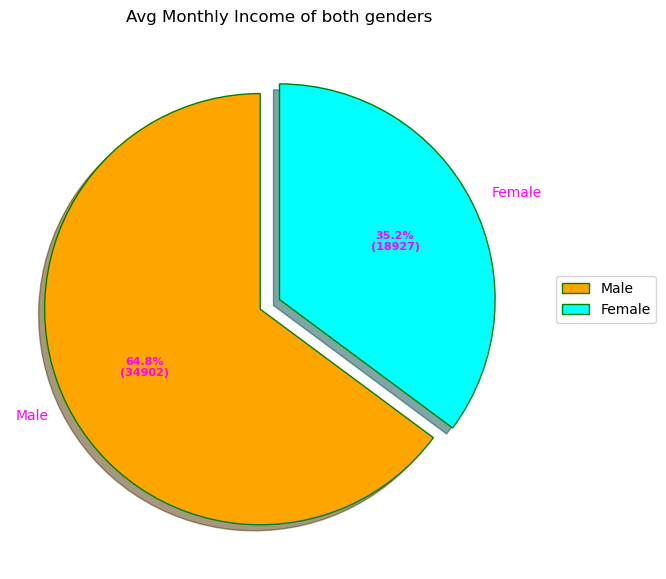

In [5561]:
# Creating explode data
explode = (0.1, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data1,
                                  autopct = lambda pct: func(pct, data1),
                                  explode = explode,
                                  labels = ['Male', 'Female'],
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, ['Male', 'Female'],
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Avg Monthly Income of both genders")
 
# show plot
plt.show()

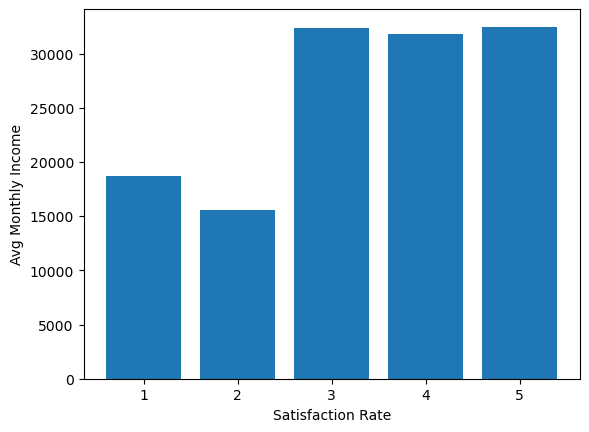

In [5562]:
satisfaction_rate = np.arange(1,6)

avgmonthlyincome_per_rate = []

sri = []


for i in satisfaction_rate:
    if(any(df['Satisfaction Rate'] == i)):
        sri.append(i)
        avgmonthlyincome_per_rate.append((df.groupby('Satisfaction Rate').get_group(i))['Avg Monthly Income'].mean())
    else:
        continue

df_r = pd.DataFrame(avgmonthlyincome_per_rate)
df_r.columns = ['Avg Monthly Income']
df_r['Satisfaction Rate'] = sri

    
pos = np.arange(6)

fig, ax = plt.subplots()
#df_r.plot.bar(x='Satisfaction Rate' , color='blue')
plt.xlabel('Satisfaction Rate')
plt.xticks(pos, pos )
plt.ylabel('Avg Monthly Income')
ax.bar(df_r['Satisfaction Rate'],df_r['Avg Monthly Income'])


plt.show()


<AxesSubplot:xlabel='Satisfaction Rate', ylabel='Avg Monthly Income'>

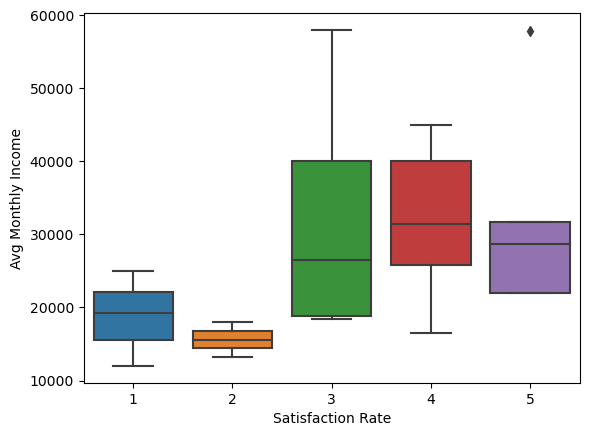

In [5563]:
sns.boxplot(x='Satisfaction Rate', y = 'Avg Monthly Income', data = df)

<AxesSubplot:xlabel='Gender', ylabel='Avg Monthly Income'>

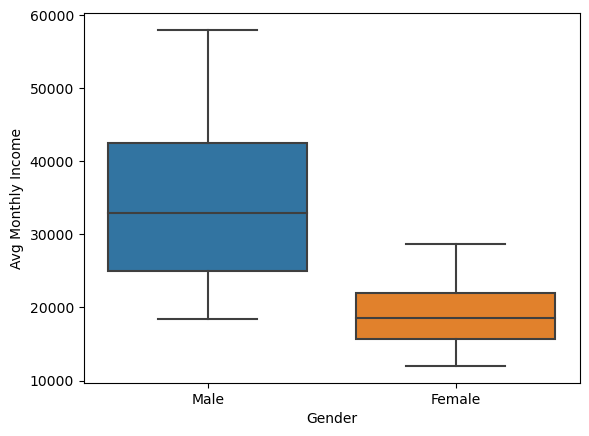

In [5564]:
sns.boxplot(x='Gender', y = 'Avg Monthly Income', data = df)

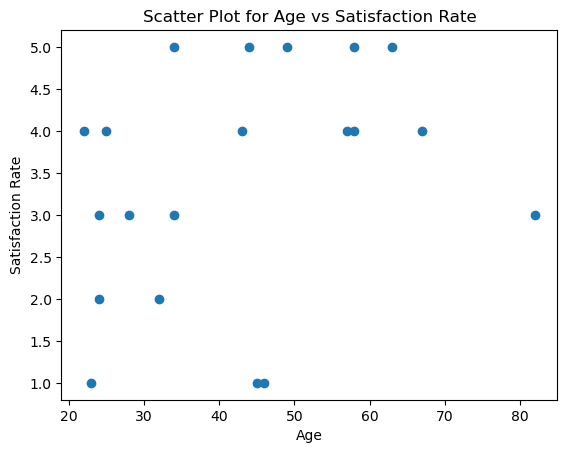

In [5565]:
plt.scatter(df["Age"], df["Satisfaction Rate"])
plt.title("Scatter Plot for Age vs Satisfaction Rate")
plt.xlabel("Age")
plt.ylabel("Satisfaction Rate")
plt.show()
#No Correlation

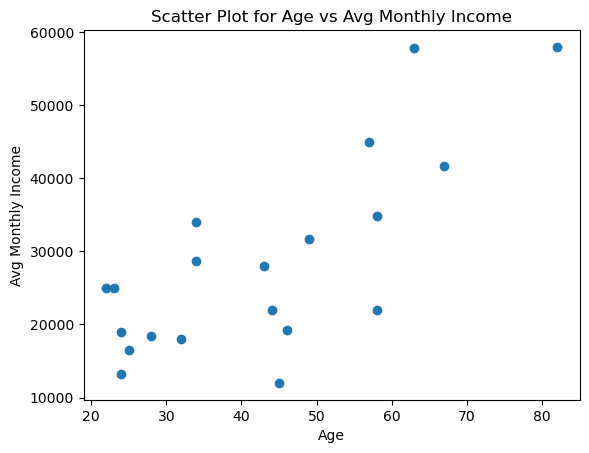

In [5566]:
plt.scatter(df["Age"], df["Avg Monthly Income"])
plt.title("Scatter Plot for Age vs Avg Monthly Income")
plt.xlabel("Age")
plt.ylabel("Avg Monthly Income")
plt.show()
#Positive correlation

C:\Users\abdul\AppData\Local\Temp\ipykernel_41356\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

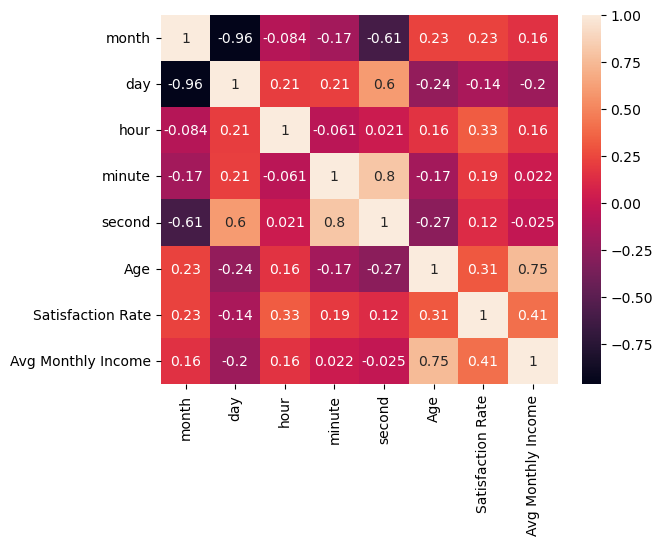

In [5567]:
sns.heatmap(df.corr(),annot=True)

In [5568]:
from scipy.stats import pearsonr

pearsonr(df['Avg Monthly Income'],df['Satisfaction Rate'])
#Weak positive correlation between avg monthly income and Satisfaction Rate regardless of gender segregation since pvalue > 0.005 and correlation coefficient > 0.2

PearsonRResult(statistic=0.4066162163055644, pvalue=0.07521550266046474)

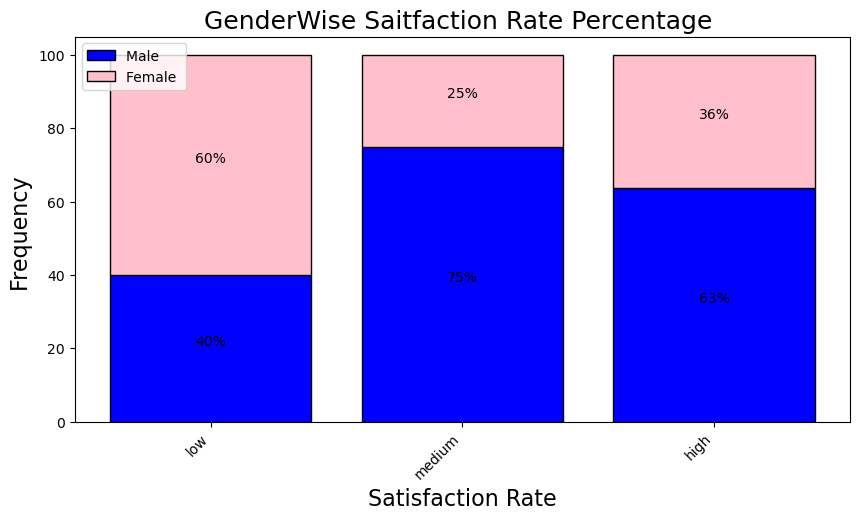

In [5569]:
categories= ['low', 'medium', 'high']
countm = []
countf = []
pos = np.arange(len(categories))
dfMale = df.groupby('Gender').get_group('Male')
dfFemale = df.groupby('Gender').get_group('Female')
for category in categories:
    countm.append((dfMale['Satisfaction Rate_label'].value_counts()[category]) * 100 / (df['Satisfaction Rate_label'].value_counts()[category]))
    countf.append((dfFemale['Satisfaction Rate_label'].value_counts()[category]) * 100 / (df['Satisfaction Rate_label'].value_counts()[category]))

fig, ax = plt.subplots (figsize= (10,5))
bar1 = plt.bar(pos,countm,color='blue',edgecolor='black' )
bar2 = plt.bar(pos,countf,color='pink',edgecolor='black',bottom=countm)

for rectangle in bar1:
    height = rectangle.get_height()
    if(height > 0): 
        plt.text(rectangle.get_x() + rectangle.get_width() /2., 0.5 *
        height, '%d' % (height) + '%', ha='center', va = 'bottom')
for rectangle in bar2:
    height = rectangle.get_height()
    if(height > 0):
        plt.text(rectangle.get_x() + rectangle.get_width() /2., rectangle.get_y() + 0.5 *
        height ,'%d' % (height) + '%', ha='center', va = 'bottom') 
    
plt.xticks(pos, categories)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.xlabel('Satisfaction Rate', fontsize=16)
plt.ylabel('Frequency ', fontsize=16)
plt.title('GenderWise Saitfaction Rate Percentage ',fontsize=18)
plt.legend(['Male ','Female '],loc=2)

plt.show()

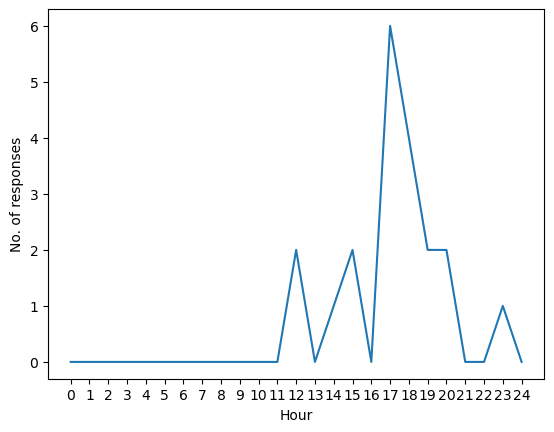

In [5570]:
hourlyspan = np.array(df.hour)
hours = []



count_arr = np.bincount(hourlyspan)

for h in range(0,25):
    hours.append(h)

hourly_no_responses=[]

for hour in hours:
    if hour in hourlyspan:
        hourly_no_responses.append(count_arr[hour])
    else:
        hourly_no_responses.append(0)


plt.plot(hourly_no_responses)
plt.xlabel('Hour')
plt.xticks(np.arange(25), [h for h in range(0,25) ] )
plt.ylabel('No. of responses')

plt.show()



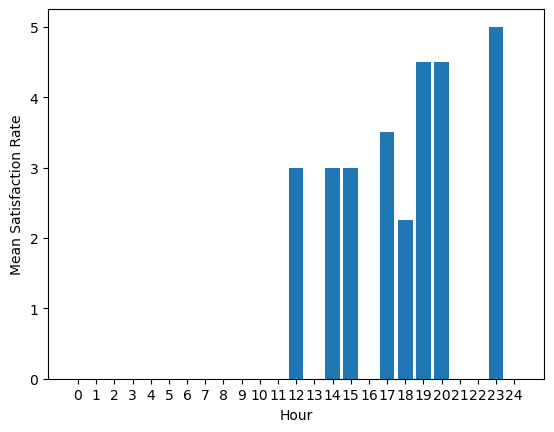

In [5573]:
hours = []

for h in range(0,25):
    hours.append(h)

mean_satisfaction_rate = []

for hour in hours:
    if hour in df.hour.values:
        dfh = df.groupby('hour').get_group(hour)
        mean_satisfaction_rate.append(dfh['Satisfaction Rate'].mean())
    else:
        mean_satisfaction_rate.append(0)


    
pos = np.arange(25)

fig, ax = plt.subplots()
plt.xlabel('Hour')
plt.xticks(pos, pos )
plt.yticks(np.arange(6),[0,1,2,3,4,5])
plt.ylabel('Mean Satisfaction Rate')
ax.bar(hours,mean_satisfaction_rate)


plt.show()

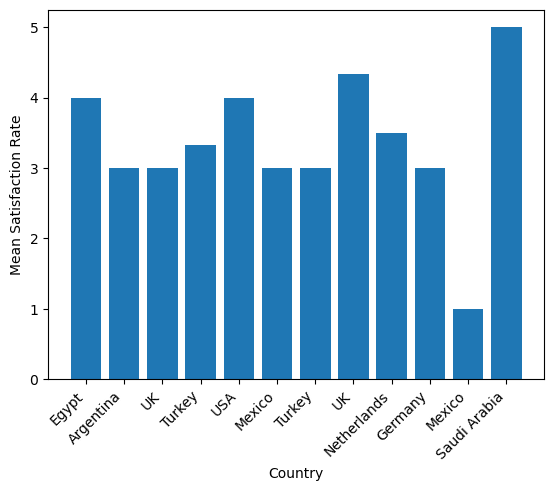

In [5574]:
#Plot mean satisfaction rate for each country
countries = []

for country in df.Country.values:
    countries.append(country)

mean_satisfaction_rate = []

for country in countries:
    if country in df.Country.values:
        dfc = df.groupby('Country').get_group(country)
        mean_satisfaction_rate.append(dfc['Satisfaction Rate'].mean())
    else:
        mean_satisfaction_rate.append(0)


    
pos = np.arange(len(countries))

fig, ax = plt.subplots()
plt.xlabel('Country')
plt.xticks(pos, [c for c in countries] )
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.yticks(np.arange(6),[0,1,2,3,4,5])
plt.ylabel('Mean Satisfaction Rate')
ax.bar(countries,mean_satisfaction_rate)


plt.show()

In [5575]:
def get_integer_mapping(le):
    '''
    Return a dict mapping labels to their integer values
    from an SKlearn LabelEncoder
    le = a fitted SKlearn LabelEncoder
    '''
    res = {}
    for cl in le.classes_:
        res.update({cl:le.transform([cl])[0]})

    return res
    
integerMapping = []

def get_label_encode(x):
    try:
        my_int = int(x)
        return my_int
    except ValueError:
        return int(integerMapping[x])

In [5576]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

models=[LogisticRegression(),
LinearSVC(),
SVC(kernel='rbf'),
RandomForestClassifier(),
DecisionTreeClassifier(),
GradientBoostingClassifier(),
GaussianNB()]

model_names=['LogisticRegression','LinearSVM','rbfSVM',
 'RandomForestClassifier', 'DecisionTree',
'GradientBoostingClassifier', 'GaussianNB']

label = LabelEncoder()

df['Satisfaction Rate_label'] = label.fit_transform(df['Satisfaction Rate_label'])

integerMappingRate = get_integer_mapping(label)

label = LabelEncoder()


df['Gender'] = label.fit_transform(df['Gender'])

df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

integerMappingGender = get_integer_mapping(label)

label = LabelEncoder()

df['Country'] = label.fit_transform(df['Country'])

integerMappingCountry = get_integer_mapping(label)

integerMapping = {**integerMappingCountry, **integerMappingGender, **integerMappingRate}

X = df[['Country', 'Gender', 'Age', 'Satisfaction Rate_label']]
y = df['Avg Monthly Income']

x_train,x_test,y_train,y_test=train_test_split(X, y ,test_size=0.30,random_state=42)



acc=[]
eval_acc={}
for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.transform(x_test)
    
    y_pred=classification_model.predict(x_train)
    acc.append(accuracy_score(y_train,y_pred))
    eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc


c:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.21428571428571427,
  0.8571428571428571,
  0.8571428571428571,
  1.0,
  1.0,
  1.0,
  1.0]}

In [5577]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
# predict the y values
y_pred=regressor.predict(x_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,25000.0,22955.347885
1,31745.0,31188.525482
2,41746.0,50117.714617
3,34000.0,29862.411101
4,19000.0,10613.533441
5,25000.0,18976.588389


In [5578]:

# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MSE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.3916155523753412
MSE score: 4920.051386423646
MSE score: 33051637.076261606


<AxesSubplot:>

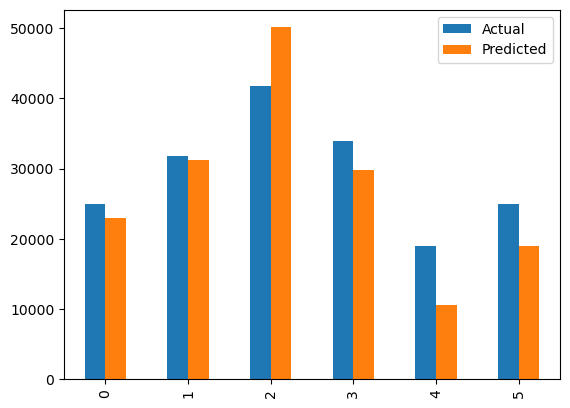

In [5579]:
evaluate.head(10).plot(kind = 'bar')

In [5580]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
3,RandomForestClassifier,1.000000
4,DecisionTree,1.000000
5,GradientBoostingClassifier,1.000000
6,GaussianNB,1.000000
1,LinearSVM,0.857143
2,rbfSVM,0.857143
0,LogisticRegression,0.214286


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algorithm'>

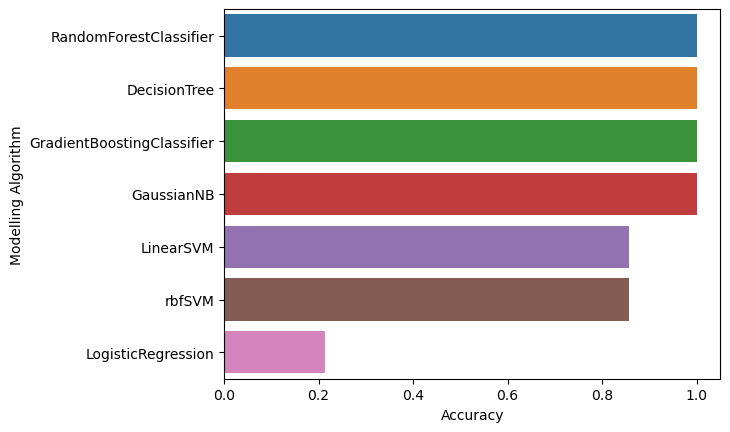

In [5581]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)